In [75]:
import pandas as pd
import os
import time
import numpy as np
import torch

In [224]:
#! pip install seaborn
#! pip install scipy

In [241]:
import seaborn as sns
from scipy import stats
from statistics import NormalDist
import matplotlib.pyplot as plt

In [76]:
torch.__version__

'1.12.1+cu102'

In [20]:
# https://stackoverflow.com/questions/66116155/how-to-tell-pytorch-which-cuda-version-to-take
#! pip install --upgrade torch==1.9.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html
#! pip install --upgrade torch==1.12.1 --extra-index-url https://download.pytorch.org/whl/cu102

In [77]:
import tensorflow as tf
#physical_devices = tf.config.list_physical_devices('CPU')
physical_devices = tf.config.list_physical_devices('GPU')

In [78]:
#tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
physical_devices

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
#device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device


device(type='cuda', index=0)

In [79]:
#test
x = torch.rand(5, 3, 
               device='cpu'
               )
print(x)

tensor([[0.4699, 0.5213, 0.8638],
        [0.0356, 0.3731, 0.5833],
        [0.7081, 0.9893, 0.6755],
        [0.2174, 0.3870, 0.3866],
        [0.0437, 0.4991, 0.8487]])


In [80]:
x.get_device()

-1

In [81]:
#! pip install transformers
#! conda install pytorch torchvision torchaudio cudatoolkit=10.1 -c pytorch
#! pip3 install torch==1.7.0 torchvision==0.8.1 -f https://download.pytorch.org/whl/cu101/torch_stable.html
#! pip install tensorflow
! nvidia-smi

Thu Dec  1 20:02:07 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.103.01   Driver Version: 470.103.01   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-PCI...  Off  | 00000000:61:00.0 Off |                    0 |
| N/A   65C    P0   111W / 250W |  36121MiB / 40536MiB |     99%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Logits Extractor
>
> Extracting Tensor Logits from a given Neural Code Model @danaderp
>

In [102]:
def params(): 
    return {
            'big_table_path' : '/workspaces/CausalCodeCapability/data/big_table/base_tesbed_EleutherAI-gpt-neo-1.3B.csv',
            'hf_model' : 'EleutherAI/gpt-neo-1.3B' 
}

In [103]:
#pwd
parameters = params()
parameters['big_table_path']

'/workspaces/CausalCodeCapability/data/big_table/base_tesbed_EleutherAI-gpt-neo-1.3B.csv'

# Data Upload

In [104]:
data_pd = pd.read_csv( 
                      parameters['big_table_path'] , 
                      index_col=0
            )

In [105]:
data_pd.describe()

,model_total_input_ids
count,100.000000
mean,355.800000
std,338.974776
min,67.000000
25%,145.750000
50%,241.500000
75%,420.250000
max,1675.000000


In [106]:
data_pd.head(5)

,whole_func_string,ast_concepts,model_tokenizer_concepts,model_input_ids,model_total_input_ids
0,"def gen_filter(name, op, value, is_or=False):\...","[('def', 'def', 'function_definition'), ('gen_...","[(4299, 'def', 'function_definition'), (2429, ...","[4299, 2429, 62, 24455, 7, 3672, 11, 1034, 11,...",123
1,"def wave_saver(u, x, y, t):\n """"""save the w...","[('def', 'def', 'function_definition'), ('wave...","[(4299, 'def', 'function_definition'), (6769, ...","[4299, 6769, 62, 82, 8770, 7, 84, 11, 2124, 11...",68
2,"def start(self, opts=None):\n """""" We've...","[('def', 'def', 'function_definition'), ('star...","[(4299, 'def', 'function_definition'), (923, '...","[4299, 923, 7, 944, 11, 2172, 82, 28, 14202, 2...",742
3,"def draw_y_guidelines(self, label_height, coun...","[('def', 'def', 'function_definition'), ('draw...","[(4299, 'def', 'function_definition'), (3197, ...","[4299, 3197, 62, 88, 62, 5162, 7984, 7, 944, 1...",154
4,"def write_virtual_meta(self):\n """"""Writ...","[('def', 'def', 'function_definition'), ('writ...","[(4299, 'def', 'function_definition'), (3551, ...","[4299, 3551, 62, 32844, 62, 28961, 7, 944, 259...",488


In [107]:
data_pd['model_tokenizer_concepts'][0]

"[(4299, 'def', 'function_definition'), (2429, 'identifier', 'function_definition'), (62, 'identifier', 'function_definition'), (24455, 'identifier', 'function_definition'), (7, '(', 'parameters'), (3672, 'identifier', 'parameters'), (11, ',', 'parameters'), (1034, 'identifier', 'parameters'), (11, ',', 'parameters'), (1988, 'identifier', 'parameters'), (11, ',', 'parameters'), (318, 'identifier', 'default_parameter'), (62, 'identifier', 'default_parameter'), (273, 'identifier', 'default_parameter'), (28, '=', 'default_parameter'), (25101, 'false', 'default_parameter'), (2599, ')', 'parameters'), (198, 'ERROR', 'ERROR'), (220, 'ERROR', 'ERROR'), (220, 'ERROR', 'ERROR'), (220, 'ERROR', 'ERROR'), (37227, 'string', 'expression_statement'), (8645, 'string', 'expression_statement'), (689, 'string', 'expression_statement'), (257, 'string', 'expression_statement'), (2060, 'string', 'expression_statement'), (8106, 'string', 'expression_statement'), (5408, 'string', 'expression_statement'), (32

In [108]:
data_pd.ast_concepts.values[0][2]

"'"

In [109]:
data_pd.whole_func_string.values[0]

'def gen_filter(name, op, value, is_or=False):\n    """Generates a single filter expression for ``filter[]``."""\n    if op not in OPERATORS:\n        raise ValueError(\'Unknown operator {}\'.format(op))\n    result = u\'{} {} {}\'.format(name, op, escape_filter(value))\n    if is_or:\n        result = u\'or \' + result\n    return result'

In [94]:
data_pd.whole_func_string.values[0][:100]

'def get_vid_from_url(url):\n        """Extracts video ID from URL.\n        """\n        return match1('

# Model Upload

In [26]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers import pipeline

In [ ]:
#pip list
#! pip install git+https://github.com/huggingface/transfomers.git


In [ ]:
#tokenizer = AutoTokenizer.from_pretrained("Salesforce/codegen-2B-mono")
#tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-j-6B")
#generator = pipeline('text-generation', model='EleutherAI/gpt-neo-1.3B')
#model = AutoModelForCausalLM.from_pretrained("EleutherAI/gpt-j-6B")
generator = pipeline('text-generation', model='EleutherAI/gpt-neo-125M')


In [ ]:
generator("EleutherAI has", do_sample=True, min_length=20)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'EleutherAI has released an article about how the government agencies and their staff are being unfairly unfairly targeted'}]

In [ ]:
generator( data_pd.whole_func_string.values[0][:100], do_sample=True, min_length=20 )


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 49, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


[{'generated_text': 'def get_vid_from_url(url):\n        """Extracts video ID from URL.\n        """\n        return match1(url'}]

In [ ]:
generator2 = pipeline('text-generation', model='EleutherAI/gpt-neo-1.3B')


In [ ]:
generator2("for(int i= ", do_sample=True, min_length=50)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'for(int i=  0, k=0; i<m; i++)\n        {\n          if (m[i]!= i)\n   '}]

In [ ]:
generator2( data_pd.whole_func_string.values[0][:100], do_sample=True, max_new_tokens=50 )

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'def get_vid_from_url(url):\n        """Extracts video ID from URL.\n        """\n        return match1(url, re.compile("([0-9]+)", re.IGNORECASE)["name"])\n\n\ndef delete_vid_from_url(url):\n        """Deletes video'}]

# Extracting Logits From a Given Model

In [110]:
from transformers import GPTNeoForCausalLM, GPT2Tokenizer
model = GPTNeoForCausalLM.from_pretrained( parameters['hf_model'] )
tokenizer = GPT2Tokenizer.from_pretrained( parameters['hf_model'] )

In [96]:
tokenizer.get_vocab()

{'!': 0,
 '"': 1,
 '#': 2,
 '$': 3,
 '%': 4,
 '&': 5,
 "'": 6,
 '(': 7,
 ')': 8,
 '*': 9,
 '+': 10,
 ',': 11,
 '-': 12,
 '.': 13,
 '/': 14,
 '0': 15,
 '1': 16,
 '2': 17,
 '3': 18,
 '4': 19,
 '5': 20,
 '6': 21,
 '7': 22,
 '8': 23,
 '9': 24,
 ':': 25,
 ';': 26,
 '<': 27,
 '=': 28,
 '>': 29,
 '?': 30,
 '@': 31,
 'A': 32,
 'B': 33,
 'C': 34,
 'D': 35,
 'E': 36,
 'F': 37,
 'G': 38,
 'H': 39,
 'I': 40,
 'J': 41,
 'K': 42,
 'L': 43,
 'M': 44,
 'N': 45,
 'O': 46,
 'P': 47,
 'Q': 48,
 'R': 49,
 'S': 50,
 'T': 51,
 'U': 52,
 'V': 53,
 'W': 54,
 'X': 55,
 'Y': 56,
 'Z': 57,
 '[': 58,
 '\\': 59,
 ']': 60,
 '^': 61,
 '_': 62,
 '`': 63,
 'a': 64,
 'b': 65,
 'c': 66,
 'd': 67,
 'e': 68,
 'f': 69,
 'g': 70,
 'h': 71,
 'i': 72,
 'j': 73,
 'k': 74,
 'l': 75,
 'm': 76,
 'n': 77,
 'o': 78,
 'p': 79,
 'q': 80,
 'r': 81,
 's': 82,
 't': 83,
 'u': 84,
 'v': 85,
 'w': 86,
 'x': 87,
 'y': 88,
 'z': 89,
 '{': 90,
 '|': 91,
 '}': 92,
 '~': 93,
 '¡': 94,
 '¢': 95,
 '£': 96,
 '¤': 97,
 '¥': 98,
 '¦': 99,
 '§': 100

In [111]:
len( tokenizer.get_vocab() ) #todo an assert

50257

In [112]:
#prompts = data_pd.whole_func_string.values[:2]
prompts = data_pd.whole_func_string.values

In [113]:
len(prompts)

100

In [100]:
prompts[:2]

array(['def get_vid_from_url(url):\n        """Extracts video ID from URL.\n        """\n        return match1(url, r\'youtu\\.be/([^?/]+)\') or \\\n          match1(url, r\'youtube\\.com/embed/([^/?]+)\') or \\\n          match1(url, r\'youtube\\.com/v/([^/?]+)\') or \\\n          match1(url, r\'youtube\\.com/watch/([^/?]+)\') or \\\n          parse_query_param(url, \'v\') or \\\n          parse_query_param(parse_query_param(url, \'u\'), \'v\')',
       'def sina_xml_to_url_list(xml_data):\n    """str->list\n    Convert XML to URL List.\n    From Biligrab.\n    """\n    rawurl = []\n    dom = parseString(xml_data)\n    for node in dom.getElementsByTagName(\'durl\'):\n        url = node.getElementsByTagName(\'url\')[0]\n        rawurl.append(url.childNodes[0].data)\n    return rawurl'],
      dtype=object)

In [ ]:
#tokenized_code = tokenizer(prompt, return_tensors="pt")
#input_ids = tokenized_code.input_ids #tst

In [114]:
#Making space for the tensors
input_ids_list = tokenizer.batch_encode_plus( prompts )
input_ids_list = [torch.Tensor( np.array( input_ids ) ) for input_ids in input_ids_list.input_ids if len(input_ids) <= 2048]

In [116]:
len(input_ids_list)

100

In [117]:
data_pd.model_input_ids.values[0]

'[4299, 2429, 62, 24455, 7, 3672, 11, 1034, 11, 1988, 11, 318, 62, 273, 28, 25101, 2599, 198, 220, 220, 220, 37227, 8645, 689, 257, 2060, 8106, 5408, 329, 7559, 24455, 21737, 15506, 526, 15931, 198, 220, 220, 220, 611, 1034, 407, 287, 43521, 1404, 20673, 25, 198, 220, 220, 220, 220, 220, 220, 220, 5298, 11052, 12331, 10786, 20035, 10088, 23884, 4458, 18982, 7, 404, 4008, 198, 220, 220, 220, 1255, 796, 334, 6, 90, 92, 23884, 23884, 4458, 18982, 7, 3672, 11, 1034, 11, 6654, 62, 24455, 7, 8367, 4008, 198, 220, 220, 220, 611, 318, 62, 273, 25, 198, 220, 220, 220, 220, 220, 220, 220, 1255, 796, 334, 6, 273, 705, 1343, 1255, 198, 220, 220, 220, 1441, 1255]'

In [119]:
input_ids_list[0]

tensor([4.2990e+03, 2.4290e+03, 6.2000e+01, 2.4455e+04, 7.0000e+00, 3.6720e+03,
        1.1000e+01, 1.0340e+03, 1.1000e+01, 1.9880e+03, 1.1000e+01, 3.1800e+02,
        6.2000e+01, 2.7300e+02, 2.8000e+01, 2.5101e+04, 2.5990e+03, 1.9800e+02,
        2.2000e+02, 2.2000e+02, 2.2000e+02, 3.7227e+04, 8.6450e+03, 6.8900e+02,
        2.5700e+02, 2.0600e+03, 8.1060e+03, 5.4080e+03, 3.2900e+02, 7.5590e+03,
        2.4455e+04, 2.1737e+04, 1.5506e+04, 5.2600e+02, 1.5931e+04, 1.9800e+02,
        2.2000e+02, 2.2000e+02, 2.2000e+02, 6.1100e+02, 1.0340e+03, 4.0700e+02,
        2.8700e+02, 4.3521e+04, 1.4040e+03, 2.0673e+04, 2.5000e+01, 1.9800e+02,
        2.2000e+02, 2.2000e+02, 2.2000e+02, 2.2000e+02, 2.2000e+02, 2.2000e+02,
        2.2000e+02, 5.2980e+03, 1.1052e+04, 1.2331e+04, 1.0786e+04, 2.0035e+04,
        1.0088e+04, 2.3884e+04, 4.4580e+03, 1.8982e+04, 7.0000e+00, 4.0400e+02,
        4.0080e+03, 1.9800e+02, 2.2000e+02, 2.2000e+02, 2.2000e+02, 1.2550e+03,
        7.9600e+02, 3.3400e+02, 6.0000e+

In [120]:
torch.cuda

<module 'torch.cuda' from '/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py'>

In [121]:
len(input_ids_list) #Filtered Window

100

In [122]:
tokenizer.decode( input_ids_list[0] ) #Decoding IDs

'def gen_filter(name, op, value, is_or=False):\n    """Generates a single filter expression for ``filter[]``."""\n    if op not in OPERATORS:\n        raise ValueError(\'Unknown operator {}\'.format(op))\n    result = u\'{} {} {}\'.format(name, op, escape_filter(value))\n    if is_or:\n        result = u\'or\'+ result\n    return result'

In [123]:
model.to( 'cpu' ) #WARNING, Changed it later to GPU

GPTNeoForCausalLM(
  (transformer): GPTNeoModel(
    (wte): Embedding(50257, 2048)
    (wpe): Embedding(2048, 2048)
    (drop): Dropout(p=0.0, inplace=False)
    (h): ModuleList(
      (0): GPTNeoBlock(
        (ln_1): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
        (attn): GPTNeoAttention(
          (attention): GPTNeoSelfAttention(
            (attn_dropout): Dropout(p=0.0, inplace=False)
            (resid_dropout): Dropout(p=0.0, inplace=False)
            (k_proj): Linear(in_features=2048, out_features=2048, bias=False)
            (v_proj): Linear(in_features=2048, out_features=2048, bias=False)
            (q_proj): Linear(in_features=2048, out_features=2048, bias=False)
            (out_proj): Linear(in_features=2048, out_features=2048, bias=True)
          )
        )
        (ln_2): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
        (mlp): GPTNeoMLP(
          (c_fc): Linear(in_features=2048, out_features=8192, bias=True)
          (c_proj): Linear(

In [124]:
#Output is the class CausalLMOutputWithPast (https://huggingface.co/transformers/v4.10.1/main_classes/output.html?highlight=causallmoutputwithpast)
#logits (torch.FloatTensor of shape (batch_size, sequence_length, config.vocab_size)) – Prediction scores of the language modeling head (scores for each vocabulary token before SoftMax).
# output = model(input_ids=input_ids)
# [WARNING TAKES TIME]
output = [ model( input_ids = i.to(torch.int64) ) for i in input_ids_list ]

In [125]:
output_logits = [ o.logits for o in output ]

In [127]:
#Based on the response here: https://stackoverflow.com/questions/62852940/how-to-get-immediate-next-word-probability-using-gpt2-model
# next_token_logits = output[0][:, -1, :] #last token
output_logits[1].shape #The loggits contains the information of the next token prediction given the prevous windows w_{<t}

torch.Size([68, 50257])

In [126]:
output_logits[1][0]

tensor([ -4.7163,  -4.1678,  -8.0573,  ..., -14.3003, -12.5503, -10.1957],
       grad_fn=<SelectBackward0>)

In [128]:
sum( output_logits[1][0] ) #non-normalized tokens summup different than 1

tensor(-605830.6875, grad_fn=<AddBackward0>)

In [129]:
soft = torch.nn.Softmax( dim = 0 ) #Flattening normalization
next_token_distribution = soft( output_logits[1][0] ) #Flattening normalization

In [130]:
next_token_distribution.shape

torch.Size([50257])

## Batch Softmax Distribution

In [131]:
output_logits

[tensor([[ -4.7163,  -4.1678,  -8.0573,  ..., -14.3003, -12.5503, -10.1957],
         [ -9.2239,  -8.1767,  -8.8146,  ..., -20.5362, -20.4337, -12.1669],
         [ -9.6448,  -8.3923,  -8.0111,  ..., -17.3091, -16.1181, -12.3142],
         ...,
         [-13.4682, -13.2646, -11.4080,  ..., -19.5315, -13.1823, -12.6757],
         [-14.1863, -11.4593, -15.3960,  ..., -22.2008, -12.9556, -13.0003],
         [-15.0000, -12.9360, -12.1891,  ..., -24.1901, -22.9841,  -7.6805]],
        grad_fn=<MmBackward0>),
 tensor([[ -4.7163,  -4.1678,  -8.0573,  ..., -14.3003, -12.5503, -10.1957],
         [ -8.3601,  -7.9122,  -9.7703,  ..., -17.3367, -17.4455, -11.4849],
         [ -9.3722,  -8.5006, -10.2723,  ..., -16.9873, -18.3857, -11.3308],
         ...,
         [-10.7251,  -9.6926,  -9.0401,  ..., -22.4652, -19.6079, -14.2884],
         [-12.8038, -13.8421, -12.0372,  ..., -23.5786, -24.5561, -14.7295],
         [-16.0422, -20.4204,  -7.0074,  ..., -25.4207, -21.3484,  -7.8267]],
        grad_f

In [132]:
next_token_distributions = [ [soft( logits ) for logits in prompt_tesor]  for prompt_tesor in output_logits ]

In [133]:
sum( next_token_distributions[0][0] ) #tst

tensor(1.0000, grad_fn=<AddBackward0>)

In [134]:
def topk_tuple( vocab_token, largest):
    token_position_dict = list( tokenizer.get_vocab().keys() )
    topk = vocab_token.topk( k=1 , largest=largest ) #TODO K number of elements can be extended
    return ( token_position_dict[topk.indices], topk.values)

### MAX Case

In [135]:
#maximum case
#return A namedtuple of (values, indices)
#If Largest True then search for the max case
max_logit_token_prompt = [[ topk_tuple(vocab_token=vocab_token, largest=True) for vocab_token in prompt ] for prompt in next_token_distributions ]
max_logit_token_prompt

[[('module', tensor([0.3343], grad_fn=<TopkBackward0>)),
  ('_', tensor([0.6235], grad_fn=<TopkBackward0>)),
  ('test', tensor([0.0180], grad_fn=<TopkBackward0>)),
  ('_', tensor([0.4504], grad_fn=<TopkBackward0>)),
  ('self', tensor([0.0685], grad_fn=<TopkBackward0>)),
  (',', tensor([0.6870], grad_fn=<TopkBackward0>)),
  ('Ġfilter', tensor([0.0664], grad_fn=<TopkBackward0>)),
  (',', tensor([0.5936], grad_fn=<TopkBackward0>)),
  ('Ġargs', tensor([0.1244], grad_fn=<TopkBackward0>)),
  (',', tensor([0.4483], grad_fn=<TopkBackward0>)),
  ('Ġfilter', tensor([0.0418], grad_fn=<TopkBackward0>)),
  ('_', tensor([0.7171], grad_fn=<TopkBackward0>)),
  ('list', tensor([0.0182], grad_fn=<TopkBackward0>)),
  (')', tensor([0.2692], grad_fn=<TopkBackward0>)),
  ('True', tensor([0.4249], grad_fn=<TopkBackward0>)),
  ('):', tensor([0.6139], grad_fn=<TopkBackward0>)),
  ('Ċ', tensor([0.9454], grad_fn=<TopkBackward0>)),
  ('Ġ', tensor([0.9588], grad_fn=<TopkBackward0>)),
  ('Ġ', tensor([0.9582], grad_

In [136]:
data_pd['max_prob_case'] = max_logit_token_prompt

In [137]:
data_pd.head(1)

,whole_func_string,ast_concepts,model_tokenizer_concepts,model_input_ids,model_total_input_ids,max_prob_case
0,"def gen_filter(name, op, value, is_or=False):\...","[('def', 'def', 'function_definition'), ('gen_...","[(4299, 'def', 'function_definition'), (2429, ...","[4299, 2429, 62, 24455, 7, 3672, 11, 1034, 11,...",123,"[(module, [tensor(0.3343, grad_fn=<UnbindBackw..."


### MIN Case

In [138]:
#minimum case
min_logit_token_prompt = [[ topk_tuple(vocab_token=vocab_token, largest=False) for vocab_token in prompt ] for prompt in next_token_distributions ]

In [139]:
data_pd['min_prob_case'] = min_logit_token_prompt
data_pd.head(1)

,whole_func_string,ast_concepts,model_tokenizer_concepts,model_input_ids,model_total_input_ids,max_prob_case,min_prob_case
0,"def gen_filter(name, op, value, is_or=False):\...","[('def', 'def', 'function_definition'), ('gen_...","[(4299, 'def', 'function_definition'), (2429, ...","[4299, 2429, 62, 24455, 7, 3672, 11, 1034, 11,...",123,"[(module, [tensor(0.3343, grad_fn=<UnbindBackw...","[(ĠPremiership, [tensor(8.5841e-14, grad_fn=<U..."


### Actual Token Case

In [140]:
#actual token case
actual_logit_token_prompt = []
token_position_dict = list( tokenizer.get_vocab().keys() )
for p,prompt in enumerate( input_ids_list ):
    temp_prompt = []
    for c,code_token_position in enumerate( prompt[1:] ): #Eliminate the first token prediction since we do not use it
        temp_prompt.append( 
                ( token_position_dict[int(code_token_position)],next_token_distributions[ p ][ c ][int(code_token_position)] )        
            )
    actual_logit_token_prompt.append( temp_prompt )

In [141]:
data_pd['actual_prob_case'] = actual_logit_token_prompt
data_pd.head(1)

,whole_func_string,ast_concepts,model_tokenizer_concepts,model_input_ids,model_total_input_ids,max_prob_case,min_prob_case,actual_prob_case
0,"def gen_filter(name, op, value, is_or=False):\...","[('def', 'def', 'function_definition'), ('gen_...","[(4299, 'def', 'function_definition'), (2429, ...","[4299, 2429, 62, 24455, 7, 3672, 11, 1034, 11,...",123,"[(module, [tensor(0.3343, grad_fn=<UnbindBackw...","[(ĠPremiership, [tensor(8.5841e-14, grad_fn=<U...","[(Ġgen, tensor(0.0002, grad_fn=<SelectBackward..."


In [146]:
## Saving File
data_pd.to_csv( '/workspaces/CausalCodeCapability/data/big_table/testbed_base_EleutherAI-gpt-neo-1.3B.csv' )

## Statistical Analysis

In [148]:
len(data_pd.actual_prob_case.values[0])

122

In [158]:
data_pd.actual_prob_case.values[0][-2]

('Ġreturn', tensor(0.7451, grad_fn=<SelectBackward0>))

In [159]:
tokenizer.get_vocab()['Ġreturn']

1441

In [177]:
child_logits = {}
parent_logits = {}

for i,sequence in enumerate( data_pd.actual_prob_case.values ):
    #print(sequence)
    tok_tuple_list = eval( data_pd.model_tokenizer_concepts.values[i] )
    for j,label_tuple in enumerate( tok_tuple_list[1:] ): #Dropping first token
        if label_tuple[1] in set( child_logits.keys() ):
            #print('in',label_tuple,sequence[j])
            child_logits[label_tuple[1]].append( sequence[j][1] )
        else:
            #print('out',label_tuple,sequence[j])
            child_logits[label_tuple[1]] = []
            child_logits[label_tuple[1]].append( sequence[j][1] )
            
        ### PARENT
        if label_tuple[1] in set( parent_logits.keys() ):
            #print('in',label_tuple,sequence[j])
            parent_logits[label_tuple[2]].append( sequence[j][1] )
        else:
            #print('out',label_tuple,sequence[j])
            parent_logits[label_tuple[2]] = []
            parent_logits[label_tuple[2]].append( sequence[j][1] )

In [253]:
parent_logits['function_definition']

[tensor(4.9403e-07, grad_fn=<SelectBackward0>)]

In [185]:
parent_logits.keys()

dict_keys(['function_definition', 'parameters', 'default_parameter', 'ERROR', 'expression_statement', 'if_statement', 'comparison_operator', 'raise_statement', 'call', 'argument_list', 'attribute', 'assignment', 'binary_operator', 'return_statement', 'global_statement', 'block', 'try_statement', 'lambda', 'lambda_parameters', 'not_operator', 'boolean_operator', 'dictionary', 'subscript', 'elif_clause', 'pass_statement', 'finally_clause', 'for_statement', 'keyword_argument', 'pair', 'dictionary_comprehension', 'for_in_clause', 'pattern_list', 'if_clause', 'list_splat_pattern', 'augmented_assignment', 'parenthesized_expression', 'tuple', 'else_clause', 'list', 'slice', 'list_comprehension', 'except_clause', 'unary_operator', 'yield', 'import_from_statement', 'dotted_name', 'dictionary_splat_pattern', 'tuple_pattern', 'list_splat', 'dictionary_splat', 'with_statement', 'as_pattern', 'as_pattern_target', 'conditional_expression', 'concatenated_string', 'generator_expression', 'expression_l

In [197]:
[ (elem,np.mean( [np_elem.detach().numpy() for np_elem in parent_logits[elem] ] )) for elem in parent_logits.keys()]

[('function_definition', 4.9402684e-07),
 ('parameters', 0.45352417),
 ('default_parameter', 0.49697953),
 ('ERROR', 0.96551734),
 ('expression_statement', 0.96332645),
 ('if_statement', 0.35947895),
 ('comparison_operator', 0.49701786),
 ('raise_statement', 0.5022117),
 ('call', 0.09397892),
 ('argument_list', 0.9793428),
 ('attribute', 0.55561125),
 ('assignment', 0.9822823),
 ('binary_operator', 0.93023354),
 ('return_statement', 0.062402897),
 ('global_statement', 0.12389463),
 ('block', 0.04229165),
 ('try_statement', 0.9985191),
 ('lambda', 0.8635597),
 ('lambda_parameters', 0.9691714),
 ('not_operator', 0.99964225),
 ('boolean_operator', 0.29123697),
 ('dictionary', 0.7888982),
 ('subscript', 0.95072013),
 ('elif_clause', 0.5141071),
 ('pass_statement', 0.15036604),
 ('finally_clause', 0.99995124),
 ('for_statement', 0.9405241),
 ('keyword_argument', 0.9812852),
 ('pair', 0.874644),
 ('dictionary_comprehension', 0.6176669),
 ('for_in_clause', 0.9983662),
 ('pattern_list', 0.0209

In [199]:
[ (elem,np.mean( [np_elem.detach().numpy() for np_elem in child_logits[elem] ] )) for elem in child_logits.keys()]

[('identifier', 0.5504931),
 ('(', 0.6492624),
 (',', 0.6478024),
 ('=', 0.73198533),
 ('false', 0.42686236),
 (')', 0.62872636),
 ('ERROR', 0.96551734),
 ('string', 0.621419),
 ('if', 0.2772697),
 ('not', 0.22935918),
 ('in', 0.82017523),
 (':', 0.8133965),
 ('raise', 0.5658),
 ('+', 0.41851243),
 ('return', 0.41479897),
 ('global', 0.06456195),
 ('.', 0.7721778),
 ('float', 0.42957017),
 ('*', 0.2961083),
 ('none', 0.673475),
 ('comment', 0.31376114),
 ('try', 0.027253374),
 ('true', 0.62086904),
 ('lambda', 0.58812237),
 ('or', 0.110503495),
 ('}', 0.5254813),
 ('[', 0.5780259),
 ('elif', 0.55802226),
 ('pass', 0.17900899),
 ('finally', 0.07824747),
 ('for', 0.45117524),
 ('integer', 0.48820278),
 ('-', 0.32622436),
 ('{', 0.17415868),
 ('%', 0.84188503),
 (']', 0.6644342),
 ('|=', 0.5004129),
 ('&', 0.6276737),
 ('is', 0.6191611),
 ('else', 0.5030283),
 ('<', 0.29024956),
 ('and', 0.19557978),
 ('>', 0.20081393),
 ('except', 0.73677486),
 ('==', 0.43423653),
 ('def', 0.15680842),
 

## Bootstrapping 

In [203]:
#export
def bootstrapping( np_data, np_func, size ):
    """Create a bootstrap sample given data and a function
    For instance, a bootstrap sample of means, or mediands. 
    The bootstrap replicates are a long as the original size
    we can choose any observation more than once (resampling with replacement:np.random.choice)
    """
    
    #Cleaning NaNs
    #np_data_clean = np_data[ np.logical_not( np.isnan(np_data) ) ] 
    
    #The size of the bootstrap replicate is as big as size
    #Creating the boostrap replicates as long as the orignal data size
    #This strategy might work as imputation 
    bootstrap_repl = [ np_func( np.random.choice( np_data, size=len(np_data) ) ) for i in range( size ) ]
    
    #logging.info("Covariate: " + cov) #Empirical Mean
    #logging.info("Empirical Mean: " + str(np.mean(np_data_clean))) #Empirical Mean
    #logging.info("Bootstrapped Mean: " + str( np.mean(bootstrap_repl) ) ) #Bootstrapped Mean
    
    return np.array( bootstrap_repl )

In [212]:
def dictionary_boots( dict_concepts, np_func = np.mean, size=500):
    np_dettached = lambda np_ccp: np.array([ np_elem.detach().numpy() for np_elem in np_ccp ]).flatten()
    return {ccp: bootstrapping(np_dettached( dict_concepts[ccp] ), np_func, size) for ccp in dict_concepts.keys()}

In [213]:
dict_test = dictionary_boots(
    dict_concepts = parent_logits
)

In [234]:
pd_test_bs = pd.DataFrame.from_dict( dict_test )

In [235]:
pd_test_bs.head()

,function_definition,parameters,default_parameter,ERROR,expression_statement,if_statement,comparison_operator,raise_statement,call,argument_list,...,expression_list,typed_default_parameter,type,while_statement,import_statement,aliased_import,class_definition,continue_statement,set_comprehension,assert_statement
0,4.940268e-07,0.453524,0.49698,0.963887,0.963326,0.359479,0.497018,0.502212,0.093979,0.979343,...,0.999519,0.066759,0.336859,0.531041,0.255988,0.000065,0.995736,0.269588,0.878069,0.003569
1,4.940268e-07,0.453524,0.49698,0.964926,0.963326,0.359479,0.497018,0.502212,0.093979,0.979343,...,0.999519,0.066759,0.336859,0.531041,0.255988,0.000065,0.995736,0.269588,0.878069,0.003569
2,4.940268e-07,0.453524,0.49698,0.965100,0.963326,0.359479,0.497018,0.502212,0.093979,0.979343,...,0.999519,0.066759,0.336859,0.531041,0.255988,0.000065,0.995736,0.269588,0.878069,0.003569
3,4.940268e-07,0.453524,0.49698,0.966258,0.963326,0.359479,0.497018,0.502212,0.093979,0.979343,...,0.999519,0.066759,0.336859,0.531041,0.255988,0.000065,0.995736,0.269588,0.878069,0.003569
4,4.940268e-07,0.453524,0.49698,0.965908,0.963326,0.359479,0.497018,0.502212,0.093979,0.979343,...,0.999519,0.066759,0.336859,0.531041,0.255988,0.000065,0.995736,0.269588,0.878069,0.003569


In [251]:
pd_test_bs.describe()

,function_definition,parameters,default_parameter,ERROR,expression_statement,if_statement,comparison_operator,raise_statement,call,argument_list,...,expression_list,typed_default_parameter,type,while_statement,import_statement,aliased_import,class_definition,continue_statement,set_comprehension,assert_statement
count,5.000000e+02,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,4.940268e-07,0.453524,0.49698,0.965559,0.963326,0.359479,0.497018,0.502212,0.093979,0.979343,...,0.999519,0.066759,0.336859,0.531041,0.255989,0.000065,0.995736,0.269588,0.878069,0.003569
std,0.000000e+00,0.000000,0.00000,0.001098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
min,4.940268e-07,0.453524,0.49698,0.961945,0.963326,0.359479,0.497018,0.502212,0.093979,0.979343,...,0.999519,0.066759,0.336859,0.531041,0.255988,0.000065,0.995736,0.269588,0.878069,0.003569
25%,4.940268e-07,0.453524,0.49698,0.964908,0.963326,0.359479,0.497018,0.502212,0.093979,0.979343,...,0.999519,0.066759,0.336859,0.531041,0.255988,0.000065,0.995736,0.269588,0.878069,0.003569
50%,4.940268e-07,0.453524,0.49698,0.965573,0.963326,0.359479,0.497018,0.502212,0.093979,0.979343,...,0.999519,0.066759,0.336859,0.531041,0.255988,0.000065,0.995736,0.269588,0.878069,0.003569
75%,4.940268e-07,0.453524,0.49698,0.966248,0.963326,0.359479,0.497018,0.502212,0.093979,0.979343,...,0.999519,0.066759,0.336859,0.531041,0.255988,0.000065,0.995736,0.269588,0.878069,0.003569
max,4.940268e-07,0.453524,0.49698,0.969271,0.963326,0.359479,0.497018,0.502212,0.093979,0.979343,...,0.999519,0.066759,0.336859,0.531041,0.255988,0.000065,0.995736,0.269588,0.878069,0.003569


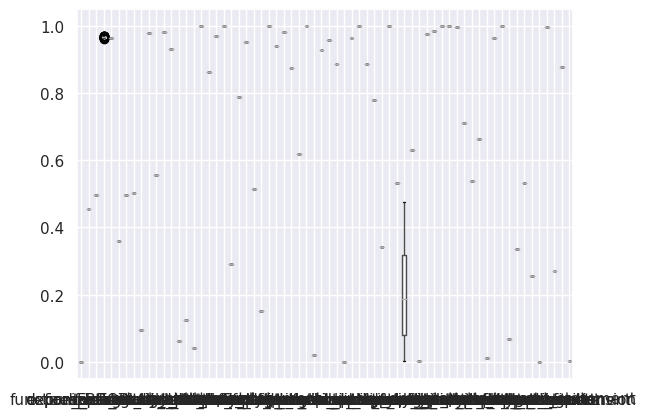

In [254]:
sns.set_theme(style="darkgrid")
boxplot = pd_test_bs.boxplot()
plt.show()

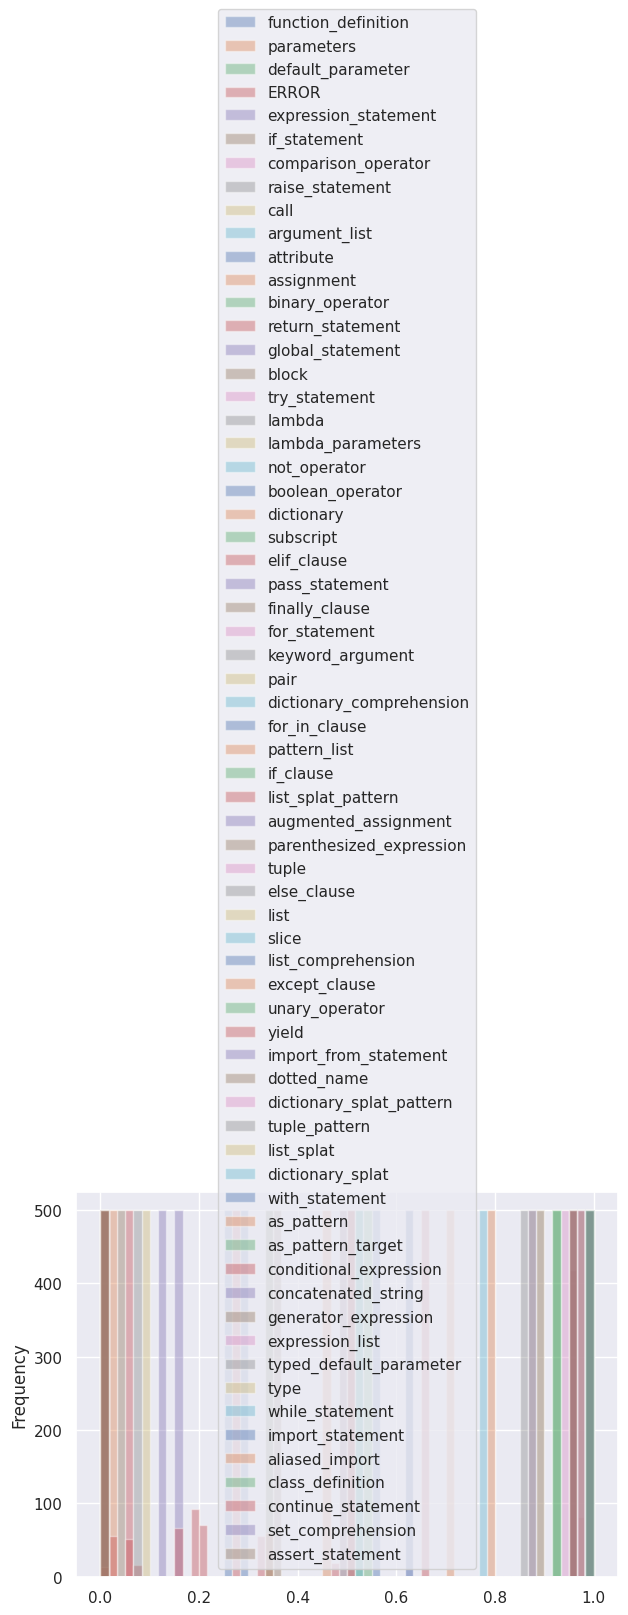

In [250]:
sns.set_theme(style="darkgrid")
#ax = pd_test_bs.plot.kde()
pd_test_bs.plot.hist(
    bins=60, 
    alpha=0.4,
    figsize=(7,5)
)
plt.show()

In [218]:
assert len(dict_test['function_definition']) == len(dict_test['argument_list']) 

In [226]:
#export
#We use normal distribution assuming the sample size is big enough (~more than 100 points)
def confidence_intervals_v1(np_data_bs, conf=0.95):
    """Confidence Intervals with Gaussian Distribution (n>=30)"""
    CI = stats.norm.interval(alpha=conf, loc = np.mean( np_data_bs ), scale = stats.sem(np_data_bs))
    return CI

In [231]:
#export
#see https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
def confidence_intervals_v2(data, confidence=0.95):
    dist = NormalDist.from_samples(data)
    z = NormalDist().inv_cdf((1 + confidence) / 2.)
    h = dist.stdev * z / ((len(data) - 1) ** .5)
    return dist.mean - h, dist.mean + h, h

In [232]:
dict_test_intervals = {k: confidence_intervals_v2(dict_test[k]) for k in dict_test.keys() }

In [233]:
dict_test_intervals

{'function_definition': (4.940268354403088e-07, 4.940268354403088e-07, 0.0),
 'parameters': (0.4535241723060608, 0.4535241723060608, 0.0),
 'default_parameter': (0.4969795346260071, 0.4969795346260071, 0.0),
 'ERROR': (0.965463052576959, 0.9656556741533877, 9.631078821433487e-05),
 'expression_statement': (0.9633264541625977, 0.9633264541625977, 0.0),
 'if_statement': (0.3594789505004883, 0.3594789505004883, 0.0),
 'comparison_operator': (0.49701786041259766, 0.49701786041259766, 0.0),
 'raise_statement': (0.5022116899490356, 0.5022116899490356, 0.0),
 'call': (0.09397891908884048, 0.09397891908884048, 0.0),
 'argument_list': (0.9793428182601929, 0.9793428182601929, 0.0),
 'attribute': (0.555611252784729, 0.555611252784729, 0.0),
 'assignment': (0.982282280921936, 0.982282280921936, 0.0),
 'binary_operator': (0.9302335381507874, 0.9302335381507874, 0.0),
 'return_statement': (0.06240289658308029, 0.06240289658308029, 0.0),
 'global_statement': (0.12389463186264038, 0.12389463186264038,